# Assignment8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn import linear_model,preprocessing,pipeline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [2]:
df=pd.read_csv("car_data.csv")

y=-0.1725205027912493x+24764.559006061685


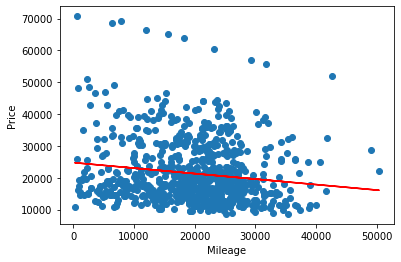

In [3]:
x1=df[["Mileage"]]
y1=df["Price"]
reg=linear_model.LinearRegression()
reg.fit(x1,y1)
y1_predic=reg.predict(x1)
print("y={}x+{}".format(reg.coef_[0],reg.intercept_))
plt.scatter(x1,y1)
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.plot(x1,y1_predic,color="red")
plt.show()

In [4]:
reg.score(x1,y1)

0.02046344732348926

In [5]:
x2=df[["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]]
y2=df["Price"]
reg=linear_model.LinearRegression()
reg.fit(x2,y2)

LinearRegression()

In [6]:
reg.score(x2,y2)

0.4462643536728379

In [7]:
df1=df.select_dtypes("object")
enc=preprocessing.OneHotEncoder()
df2=pd.DataFrame(enc.fit_transform(df1).toarray(),columns=enc.get_feature_names_out())
df3=df.drop(columns=["Make","Model","Trim","Type"])
df3=df3.join(df2)

In [8]:
df3.drop(columns=['Make_Buick','Model_9-2X AWD','Trim_AWD Sportwagon 4D','Type_Convertible'],inplace=True)

In [9]:
x3=df3.iloc[:,1:]
y3=df3["Price"]
reg=linear_model.LinearRegression()
reg.fit(x3,y3)

LinearRegression()

In [10]:
reg.score(x3,y3)

0.9924082614213805

In [11]:
f=["Mileage","Cylinder","Liter","Doors","Cruise","Sound","Leather"]
c = []   
for i in range(1, 11):
    c.append(itertools.combinations(f, i))  

In [12]:
s=0
for j in c:
    for k in j:
        k=list(k)
        x=df[k]
        d=8  
        for a in range(1,d):
            m=pipeline.Pipeline([('pol',preprocessing.PolynomialFeatures(degree=a)),('lin',linear_model.LinearRegression(fit_intercept=False))])
            m=m.fit(x,y2)
        if s<m.score(x,y2):
            s=m.score(x,y2)
            g=k
            n=a          
print(s,g,n)

0.9097847608795677 ['Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather'] 7
